In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('housing.csv')
print(df.columns)
print(df.shape)
df.head(5)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Handling Missing Values ###

In [4]:
print(df.isnull().sum())
print("\n---------------------------------\n")
df.dropna(inplace = True)
df.shape

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

---------------------------------



(20433, 10)

### OneHotEncoder ###

In [5]:
obj = OneHotEncoder(sparse_output=False)

ocean = df[['ocean_proximity']]

ocean_encod = obj.fit_transform(ocean)

cols = obj.get_feature_names_out(['ocean_proximity'])

# Create a new data frame with these columns
df_encoded = pd.DataFrame(ocean_encod, columns=cols)

df = pd.concat([df.drop('ocean_proximity', axis=1), df_encoded], axis=1)
print(obj.categories_)
df.columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
              'total_bedrooms', 'population', 'households', 'median_income',
              'median_house_value', '<1h ocean','inland','island','near bay','near ocean']

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


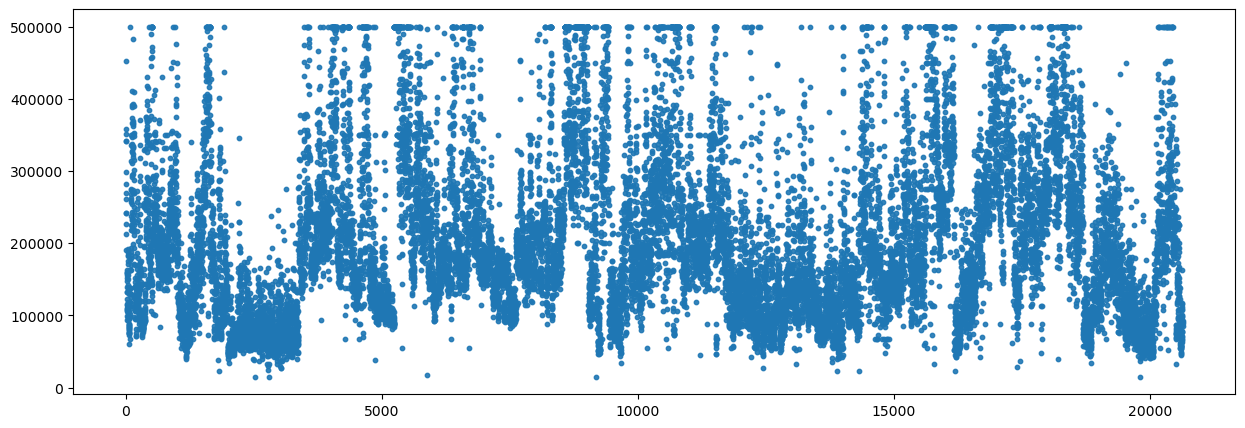

In [6]:
plt.figure(figsize=(15, 5))
plt.scatter(df.index, df['median_house_value'], alpha=0.9, s=10)


In [7]:
false_count = (df['median_house_value'] >= 500000).sum()
print("Rows with median_house_value >= 500000:", false_count)
df = df[df['median_house_value']<500000] #from graph
print(df.shape)

Rows with median_house_value >= 500000: 985
(19448, 14)


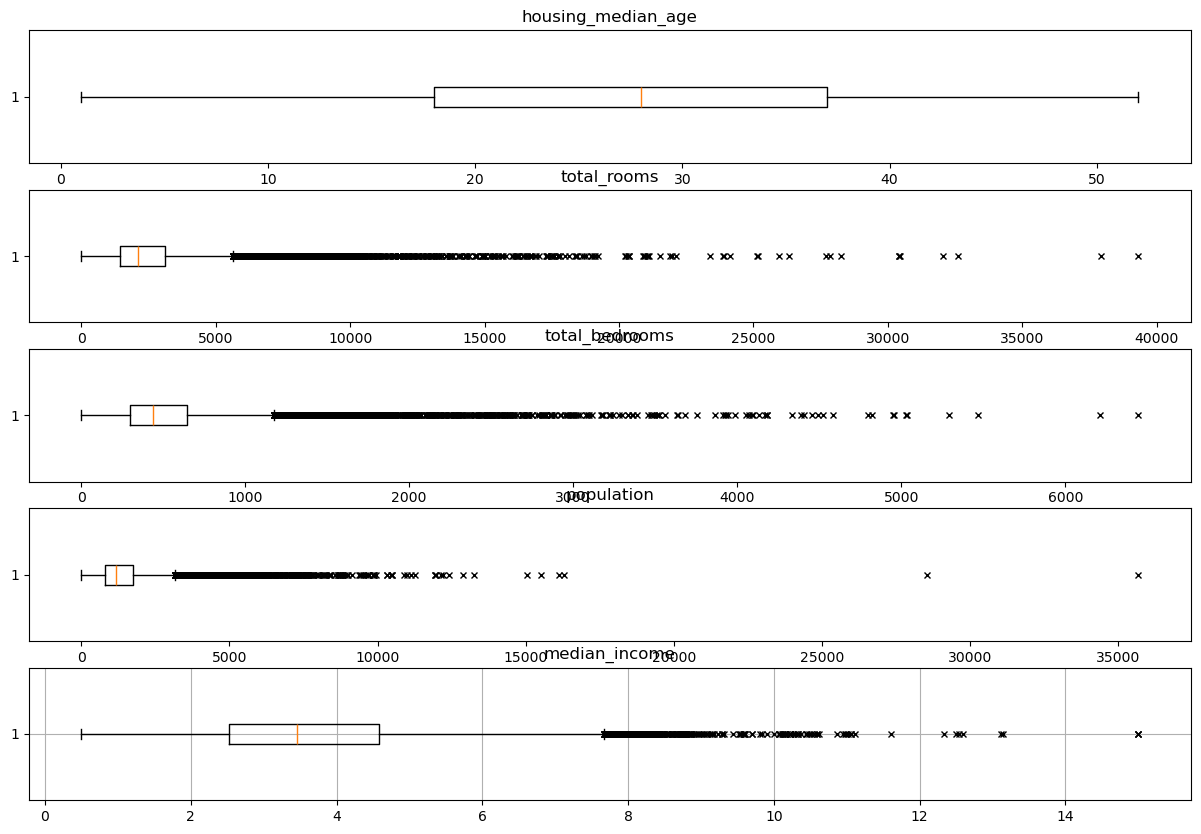

OUTLIERS


housing_median_age        ->                         0
total_rooms               ->                      1246
total_bedrooms            ->                       492
population                ->                       448
median_income             ->                       310
(16952, 14)


In [8]:
fig,axs = plt.subplots(5,1, figsize = (15,10))
#to check outliers of these columns
cols = ["housing_median_age","total_rooms","total_bedrooms","population","median_income"]
for i, feat in enumerate(cols):
    axs[i].boxplot(df[feat],vert=False,flierprops = {"marker":'x',"markersize":5})
    axs[i].set_title(feat)

plt.grid(True)
plt.show()

#to countliers in each such feature
print("OUTLIERS\n\n")
for col in cols:
    # # Calculate IQR (same as boxplot uses)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Boxplot fences (standard: 1.5 * IQR)
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Count values outside these fences
    outlier_count = df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0]
    
    print(f"{col:25} -> {outlier_count:25}")
    df = df[(df[col]>=lower_limit)&(df[col]<=upper_limit)]

print(df.shape)


In [9]:
df.describe()
for col in df.columns:
    print(f"{col:20}-> {df[col].var():<25}")

df.corr()
df['island'].sum()


longitude           -> 4.019384929762736        
latitude            -> 4.717551183213373        
housing_median_age  -> 149.06937309365338       
total_rooms         -> 1089829.038348912        
total_bedrooms      -> 43275.535485073786       
population          -> 311920.62888190494       
households          -> 37458.38145996305        
median_income       -> 2.0105303278343243       
median_house_value  -> 8940014624.822199        
<1h ocean           -> 0.24502744825265643      
inland              -> 0.22164967120413173      
island              -> 0.00023833640168716662   
near bay            -> 0.09828678662908505      
near ocean          -> 0.11185135784338078      


np.float64(4.0)

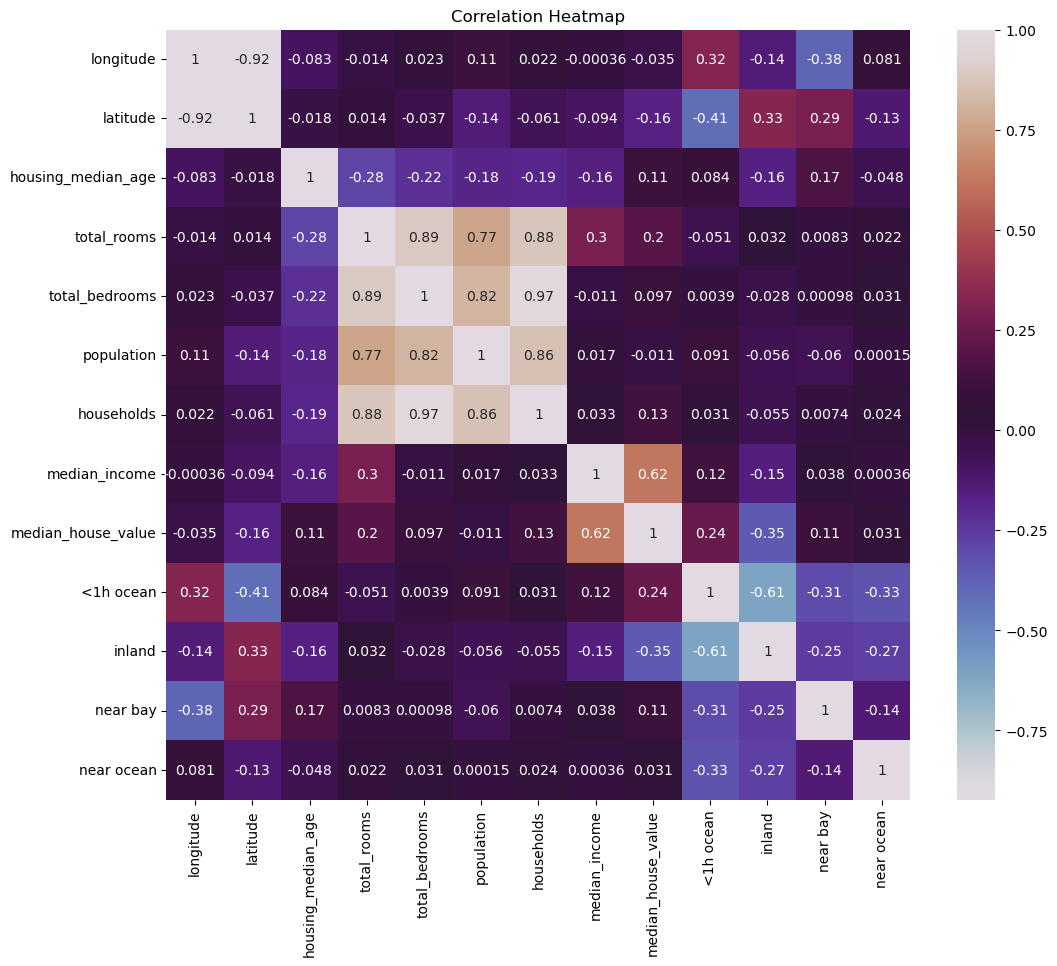

In [10]:
#remove island as it has only 4 entries
df.drop('island',axis=1,inplace=True)


plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='twilight')
plt.title("Correlation Heatmap")
plt.show()
#population have a high correlation with many 
#but less corr with median house value

In [11]:
# df.drop('population',axis=1,inplace=True)
df.drop('total_bedrooms',axis=1,inplace=True)
# df.drop('longitude',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16952 entries, 2 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16952 non-null  float64
 1   latitude            16952 non-null  float64
 2   housing_median_age  16952 non-null  float64
 3   total_rooms         16952 non-null  float64
 4   population          16952 non-null  float64
 5   households          16952 non-null  float64
 6   median_income       16952 non-null  float64
 7   median_house_value  16952 non-null  float64
 8   <1h ocean           16780 non-null  float64
 9   inland              16780 non-null  float64
 10  near bay            16780 non-null  float64
 11  near ocean          16780 non-null  float64
dtypes: float64(12)
memory usage: 1.7 MB


In [12]:
df.dropna(inplace=True)
df.to_csv('final_data.csv')